# Project: Analyzing Macbeth

## Introduction
Now we're going to do some rudimentary analysis of Shakespeare's classic play: Macbeth! You will get practice working with lists and dictionaries, conditionals, visualizing data, and thinking analytically about data.

## Objectives
You will be able to:
* Apply string methods to make changes to a string
* Use a `for` loop to iterate over a collection
* Assign values in a dictionary

## Getting the Data
Here we start by importing a Python package called `requests`. We'll use it to pull the transcript of Macbeth from the [Project Gutenberg](https://www.gutenberg.org/) website. We'll also preview a few details about what is now stored in the variable `macbeth`. As you can see, it's a string with 120,253 characters - the first 500 of which are printed below. 

In [3]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
%matplotlib inline

macbeth = requests.get('http://www.gutenberg.org/cache/epub/2264/pg2264.txt').text

print(type(macbeth))
print(len(macbeth))
print(macbeth[:500])

<class 'str'>
120253
﻿

***The Project Gutenberg's Etext of Shakespeare's First Folio***
********************The Tragedie of Macbeth*********************



*******************************************************************
THIS EBOOK WAS ONE OF PROJECT GUTENBERG'S EARLY FILES PRODUCED AT A
TIME WHEN PROOFING METHODS AND TOOLS WERE NOT WELL DEVELOPED. THERE
IS AN IMPROVED EDITION OF THIS TITLE WHICH MAY BE VIEWED AS EBOOK
(#1533) at https://www.gutenberg.org/ebooks/1533
*********************************


## Your Task

Your task is to create a bar graph of the 25 most common words in Shakespeare's Macbeth.  


A common Python programming pattern to count objects, produce histograms, or update statistics is to make calls to a dictionary as you iterate through a list. For example, given a list of words, you can create a dictionary to store counts and then iterate through the list of words, checking how many times each word has appeared using your dictionary, and updating the dictionary count now that you've seen that word again. The `.get()` dictionary method is very useful in doing this. Read the docstring for the `.get()` method and use it along with the pseudocode below to create a bar graph of the 25 most common words from the transcript of Macbeth which has been loaded into the variable 'macbeth'. Be sure to include a title and appropriate labels for your graph.

To get the 25 *most common* words, you will have to sort your counts. If you are not super sure how to do this, checkout out the [Sorting HOW TO](https://docs.python.org/3/howto/sorting.html) Python documentation. Part of being a data scientist is figuring out how to do tasks that you may not have done before. Remember, in these situations, Google is your friend!

# replacing string indents

In [4]:
macbeth = macbeth.replace('\n',' ')
macbeth = macbeth.replace('\r',' ')
macbeth = macbeth.replace('\ufeff',' ')
print(macbeth[:500])

     ***The Project Gutenberg's Etext of Shakespeare's First Folio***  ********************The Tragedie of Macbeth*********************        *******************************************************************  THIS EBOOK WAS ONE OF PROJECT GUTENBERG'S EARLY FILES PRODUCED AT A  TIME WHEN PROOFING METHODS AND TOOLS WERE NOT WELL DEVELOPED. THERE  IS AN IMPROVED EDITION OF THIS TITLE WHICH MAY BE VIEWED AS EBOOK  (#1533) at https://www.gutenberg.org/ebooks/1533  *********************************


# replacing punctuations with spaces

In [6]:
replace = {'*':' ',
          '!':' ',
          '?':' ',
          '.':' ',
          ',':' ',
          ':':' ',
          ';':' '}
replace

{'*': ' ', '!': ' ', '?': ' ', '.': ' ', ',': ' ', ':': ' ', ';': ' '}

In [9]:
for key, value in replace.items():
    macbeth = macbeth.replace(key, value)
    
print(macbeth[:1500])

        The Project Gutenberg's Etext of Shakespeare's First Folio                         The Tragedie of Macbeth                                                                                                  THIS EBOOK WAS ONE OF PROJECT GUTENBERG'S EARLY FILES PRODUCED AT A  TIME WHEN PROOFING METHODS AND TOOLS WERE NOT WELL DEVELOPED  THERE  IS AN IMPROVED EDITION OF THIS TITLE WHICH MAY BE VIEWED AS EBOOK  (#1533) at https //www gutenberg org/ebooks/1533                                                                             This is our 3rd edition of most of these plays   See the index       Copyright laws are changing all over the world  be sure to check  the copyright laws for your country before posting these files      Please take a look at the important information in this header   We encourage you to keep this file on your own disk  keeping an  electronic path open for the next readers   Do not remove this         Welcome To The World of Free Plain Vanilla Electronic 

In [16]:
# split the super string into a list of words
macbeth_list = macbeth.lower().split()
len(macbeth_list)

20418

In [17]:
# if key is in dictionary, add count 1 -> else populate the dictionary
d = {}
for word in macbeth_list:
    if word in d.keys():
        d[word] = d[word] + 1
    else:
        d[word] = 1
        
        
# sort the created dictionary with the top 25 highest values
sorted_d = sorted(d.items(), key = lambda x:x[1], reverse=True)[:25]
sorted_d = dict(sorted_d)
sorted_d

{'the': 760,
 'and': 600,
 'to': 456,
 'of': 428,
 'i': 342,
 'a': 284,
 'you': 268,
 'that': 245,
 'in': 224,
 'is': 212,
 'my': 205,
 'it': 184,
 'not': 180,
 'with': 161,
 'this': 159,
 'be': 153,
 'his': 147,
 'for': 139,
 'your': 138,
 'macb': 137,
 'our': 136,
 'but': 126,
 'haue': 122,
 'me': 115,
 'he': 112}

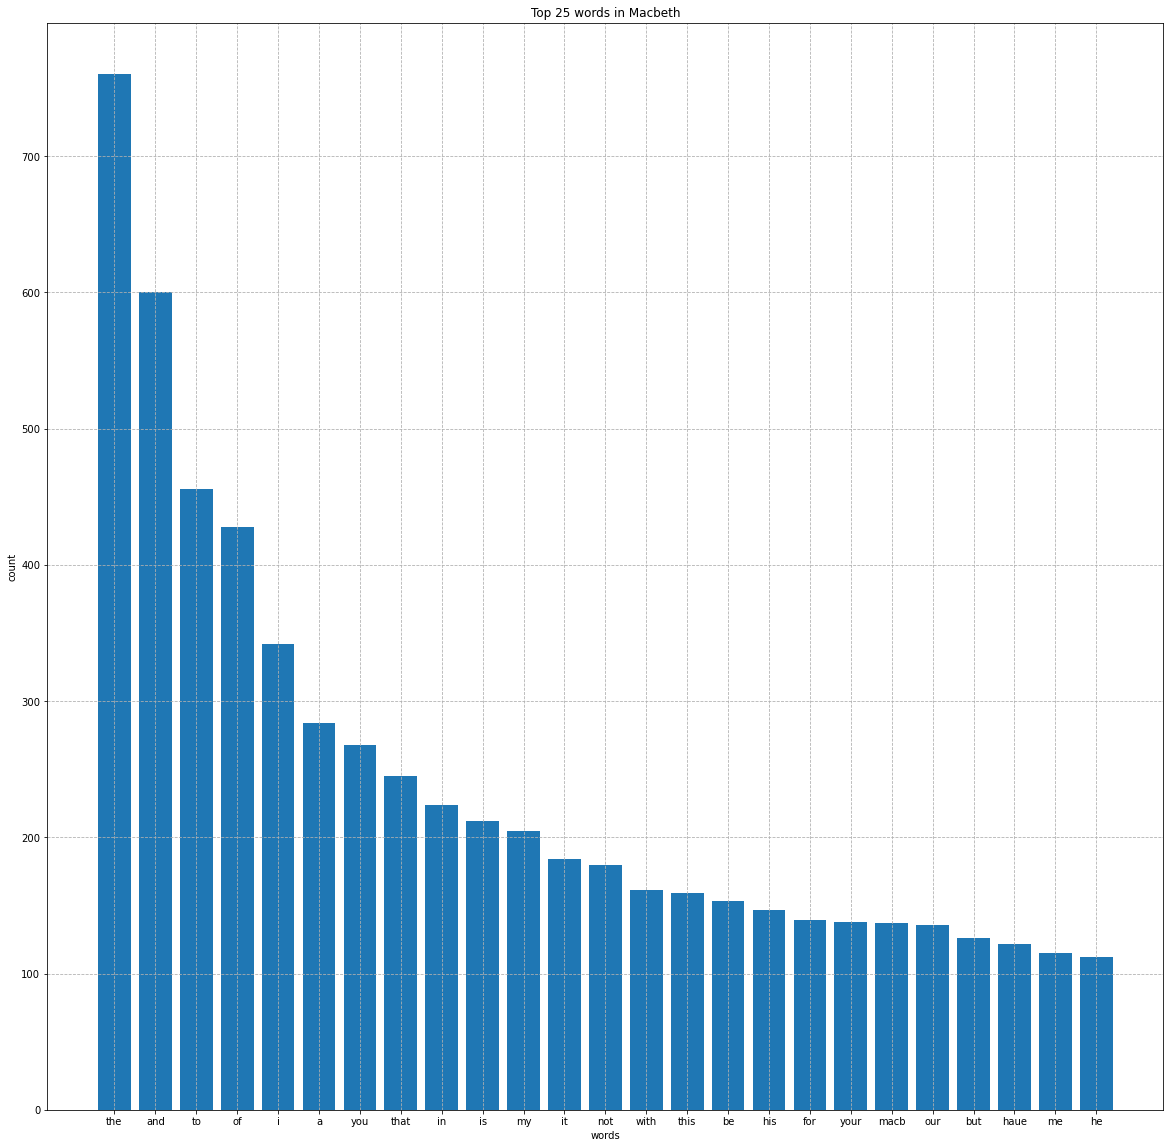

In [15]:
plt.figure(figsize=(20,20))
plt.title('Top 25 words in Macbeth')
plt.xlabel('words')
plt.ylabel('count')
plt.bar(*zip(*sorted_d.items()))
plt.grid(linestyle='--')
